In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request 
import os
data_file = "airfoil.csv"
if not os.path.exists(data_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat", "airfoil.csv")
    
af_data = pd.read_csv('airfoil.csv', header=None, delimiter="\t")

headers =  ["Frequency (Hz)","Angle of Attack (degrees)","Chord Length (m)","Free-stream Velocity (m/s)","Suction Side Displacement thickness (m)","Scaled Sound Pressure Level (dB)"]
af_data.columns = headers

af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### Part 1

In [3]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [4]:
def Category(x):
    if x >= 120  :
        return "Safe"
    else:
        return "Not Safe"

In [5]:
af_data['Categorized Sound Level'] = af_data.iloc[:,5]
af_data['Categorized Sound Level'] = af_data['Categorized Sound Level'].map(Category)

In [6]:
af_data.head()

,Frequency (Hz),Angle of Attack (degrees),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement thickness (m),Scaled Sound Pressure Level (dB),Categorized Sound Level
0,800,0.0,0.3048,71.3,0.002663,126.201,Safe
1,1000,0.0,0.3048,71.3,0.002663,125.201,Safe
2,1250,0.0,0.3048,71.3,0.002663,125.951,Safe
3,1600,0.0,0.3048,71.3,0.002663,127.591,Safe
4,2000,0.0,0.3048,71.3,0.002663,127.461,Safe


In [7]:
af_data["Categorized Sound Level"].unique()

array(['Safe', 'Not Safe'], dtype=object)

In [8]:
# Select the desired features, and the desired labels
X_1 = af_data[['Frequency (Hz)']].values
Y_1 = af_data['Categorized Sound Level']

# Fit the data to the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_1, Y_1)

LogisticRegression()

In [9]:
# Choose some convenient bounds for the x-axis
max_Frequency = max(af_data[['Frequency (Hz)']].values)+1
min_Frequency = min(af_data[['Frequency (Hz)']].values)-1

# Plot 1000 points along the logistic curve to see 
X_1_compare = np.linspace(min_Frequency, max_Frequency, 1000).reshape(-1, 1)
y_1_compare_probability = log_reg.predict_proba(X_1_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
decision_boundary1 = X_1_compare[y_1_compare_probability[:, 1] >= 0.5][0]

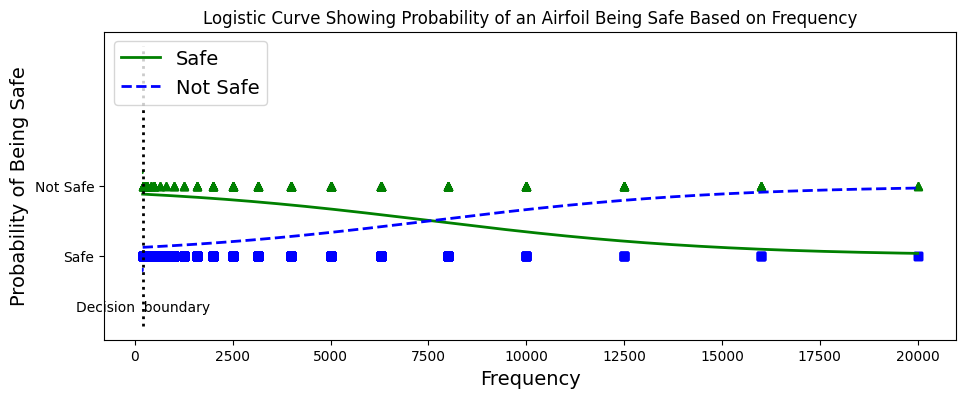

In [10]:
#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_1[Y_1=="Safe"], Y_1[Y_1=="Safe"], "bs")
plt.plot(X_1[Y_1=="Not Safe"], Y_1[Y_1=="Not Safe"], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_1_compare, y_1_compare_probability[:, 1], "g-", linewidth=2, label="Safe")
plt.plot(X_1_compare, y_1_compare_probability[:, 0], "b--", linewidth=2, label="Not Safe")

# Plot the decision boundary 
plt.plot([decision_boundary1, decision_boundary1], [-1, 3], "k:", linewidth=2)
plt.text(decision_boundary1+0.02, -0.8, "Decision  boundary", fontsize=10, color="k", ha="center")


plt.arrow(decision_boundary1[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary1[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Probability of Being Safe', fontsize=14)
plt.title('Logistic Curve Showing Probability of an Airfoil Being Safe Based on Frequency');
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [11]:
y_pred1 = log_reg.predict(X_1)
actually_safe = np.sum(Y_1 == "Safe")
labeled_safe = np.sum(y_pred1 == "Safe")
print(f"Actually Safe: {actually_safe} Predicted Safe: {labeled_safe}")

actually_notsafe = np.sum(Y_1 == "Not Safe")
labeled_notsafe = np.sum(y_pred1 == "Not Safe")

print(f"Actually Not Safe: {actually_notsafe} Predicted Not Safe: {labeled_notsafe}")

Actually Safe: 1143 Predicted Safe: 1365
Actually Not Safe: 360 Predicted Not Safe: 138


In [12]:
#from sklearn import metrics and call it metrics.
import sklearn.metrics as metrics
cm1 = metrics.confusion_matrix(Y_1, y_pred1)
print(cm1)

[[  78  282]
 [  60 1083]]


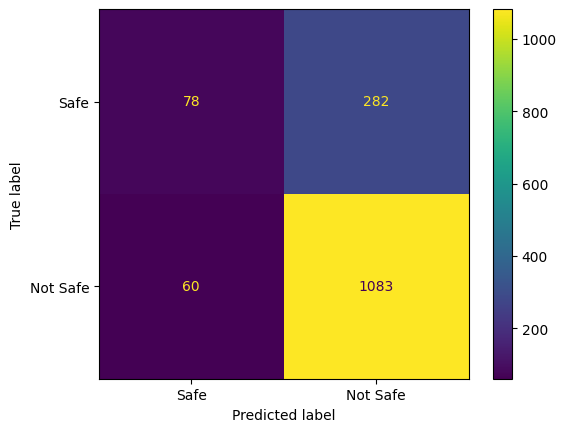

In [13]:
cnf1 = metrics.confusion_matrix(Y_1, y_pred1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf1, display_labels=["Safe", "Not Safe"])
disp.plot()
plt.show()

In [14]:
print("Accuracy:", metrics.accuracy_score(Y_1, y_pred1))
print("Precision:", metrics.precision_score(Y_1, y_pred1, pos_label="Safe"))
print("Recall:", metrics.recall_score(Y_1, y_pred1, pos_label="Not Safe"))

Accuracy: 0.7724550898203593
Precision: 0.7934065934065934
Recall: 0.21666666666666667


### Part 2

In [15]:
from sklearn.model_selection import train_test_split

X = X_1
y = Y_1

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13)
print(y_train.value_counts())
print(y_test.value_counts())

Categorized Sound Level
Safe        859
Not Safe    268
Name: count, dtype: int64
Categorized Sound Level
Safe        284
Not Safe     92
Name: count, dtype: int64


In [16]:
from sklearn.metrics import accuracy_score

# Model 1 with stratified sample
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_m1=model1.predict(X_test)
acc_m1=accuracy_score(y_pred_m1,y_test)

print(acc_m1)

0.75


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

5

In [18]:
scores = []
 
# using regression to get predicted data
model1=LogisticRegression()

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model1.fit(X_train, y_train)
    pred = model1.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
 
# get accuracy of each prediction
print(scores)

[0.773936170212766, 0.776595744680851, 0.7726063829787234, 0.7832446808510638, 0.7659574468085106]


### 1 or 2 Paragraphs

I didn't do as much in this lab as I typically do, but when it comes to the paper and the poster, I will most likely do logistic regression with the other input variables as well. I'll also most likely normalize the data in case it makes the logistic regression figure look cleaner, but you will see the final product in the paper or poster presentation.

Anyway, as for the technique that was used, we utilized logistic regression. It takes the data and looks at a variable and uses the binary output (in the case of my data, safe or not safe) and tries to determine a logistic graph that helps determine whether it's more likely for a given input to result in one of the two outcomes that we care about. Then the confusion matrix can be used to determine the reliability of the logistic curve.

The next technique utilized is splitting the data into training and test sets. It's a great method for testing which technique may handle the data the best or most accurately. We only used it with logistic regression, but we can use the training data to help train other methods as well, such as logistic regression, linear regression, K-nearest neighbors, random forest, etc.